# Algorithm Performance Analysis
This program will be used to plot the average results of the inexact and naive algorithms for jobs of various sizes. Specifically, it will visualize the average job demand peak above the resource curve for job batches ranging in size from x - y
\
\
In this way, we can visualize trends for how the main relaxed LP algorithm (inexact) performs on different job batch sizes. 

In [9]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [10]:
final_inexact_averages = []
final_naive_averages = []
final_exact_averages = []

trial_nums = 4

with open(f"../../Output_Data/Results/final_combined_objective_values.csv", "r") as file:
    data = list(csv.DictReader(file))

    for i in range(4):
        total_sum_inexact = 0
        total_sum_naive = 0
        total_sum_exact = 0
        num_entries = 0

        for line in data[i * trial_nums: (i * trial_nums) + trial_nums]:
            total_sum_inexact += float(line['inexact objective val'])
            total_sum_naive += float(line['naive obective val'])
            total_sum_exact += float(line['exact objective val'])
            num_entries += 1
        
        inexact_avg = total_sum_inexact / num_entries
        naive_avg = total_sum_naive / num_entries
        exact_avg = total_sum_exact / num_entries
        
        print("Inexact alg average:", round(inexact_avg, 2))
        print("Naive alg average:", round(naive_avg, 2))
        print("Exact alg average:", round(exact_avg, 2))

        final_inexact_averages.append(inexact_avg)
        final_naive_averages.append(naive_avg)
        final_exact_averages.append(exact_avg)
        
    print()

Inexact alg average: 7372.02
Naive alg average: 9799.0
Exact alg average: 5071.87
Inexact alg average: 9073.82
Naive alg average: 10723.49
Exact alg average: 5615.49
Inexact alg average: 7083.52
Naive alg average: 10441.72
Exact alg average: 4714.58
Inexact alg average: 7055.75
Naive alg average: 11033.13
Exact alg average: 3654.91



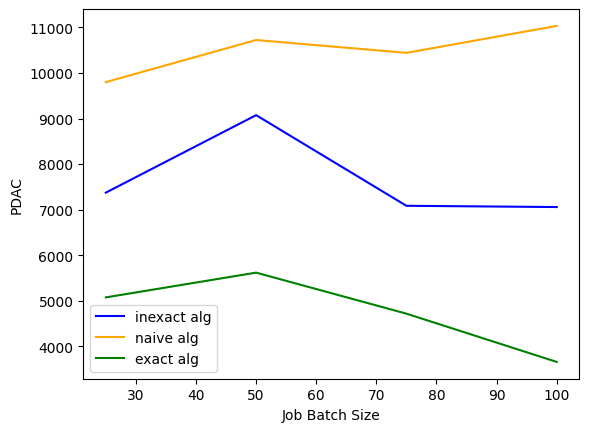

In [12]:
x_values = np.array([i for i in range(25, 125, 25)])

inexact_values = np.array(final_inexact_averages)
naive_values = np.array(final_naive_averages)
exact_values = np.array(final_exact_averages)

plt.plot(x_values, inexact_values, label='inexact alg', color='blue')
plt.plot(x_values, naive_values, label='naive alg', color='orange')
plt.plot(x_values, exact_values, label='exact alg', color='green')

plt.xlabel("Job Batch Size")
plt.ylabel("PDAC")
plt.legend()

plt.show()